Author: Nik Alleyne <br>
Author Blog: **https://www.securitynik.com** <br>
Author GitHub: **github.com/securitynik** <br>

Author Books: [  <br>

                "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/", 
                
                "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/" 
            ] 

### Why this series?
When teaching the SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals 
**https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/** I am always asked,
"Will you be sharing your demo notebooks?" or "Can we get a copy of your demo notebooks?" or ... well you get the point.
My answer is always no. Not that I do not want to share, (sharing is caring :-D) , but the demo notebooks 
by themselves, would not make sense or add real value. Hence, this series! 

This is my supplemental work, similar to what I would do in the demos but with a lot more details and references.


## 17. Beginning Deep Learning, - Classification, Pytorch

### The series includes the following: <br>
01 - Beginning Numpy <br>
02 - Beginning Tensorflow  <br>
03 - Beginning PyTorch <br>
04 - Beginning Pandas <br>
05 - Beginning Matplotlib <br>
06 - Beginning Data Scaling <br>
07 - Beginning Principal Component Analysis (PCA) <br>
08 - Beginning Machine Learning Anomaly Detection - Isolation Forest and Local Outlier Factor <br>
09 - Beginning Unsupervised Machine Learning - Clustering - K-means and DBSCAN <br>
10 - Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics <br>
11 - Beginning Linear Regression - Machine Learning <br>
12 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, Tensorflow <br>
13 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch <br>
14 - Beginning Deep Learning - Linear Regression, Tensorflow <br>
15 - Beginning Deep Learning - Linear Regression, PyTorch <br>
16 - Beginning Deep Learning - Classification, Tensorflow <br>
17 - Beginning Deep Learning - Classification, Pytorch <br>
18 - Beginning Deep Learning - Classification - regression - MIMO - Functional API Tensorflow <br> 
19 - Beginning Deep Learning - Convolution Networks - Tensorflow <br>
20 - Beginning Deep Learning - Convolution Networks - PyTorch <br>
21 - Beginning Regularization - Early Stopping, Dropout, L2 (Ridge), L1 (Lasso) <br>
22 - Beginning Model TFServing <br>

But conn.log is not the only log file within Zeek. Let's build some models for DNS and HTTP logs. <br>
I choose unsupervised, because there are no labels coming with these data. <br>

23 - Continuing Anomaly Learning - Zeek DNS Log - Machine Learning <br>
24 - Continuing Unsupervised Learning - Zeek HTTP Log - Machine Learning <br>

This was a specific ask by someone in one of my class. <br>
25 - Beginning - Reading Executables and Building a Neural Network to make predictions on suspicious vs suspicious  <br><br>

With 25 notebooks in this series, it is quite possible there are things I could have or should have done differently.  <br>
If you find any thing, you think fits those criteria, drop me a line. <br>

If you find this series beneficial, I would greatly appreciate your feedback.


In [1]:
# import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# In the notebooks on Pandas, Matplotlib and Scaling
#   04 - Beginning Pandas <br>
#   05 - Beginning Matplotlib <br>
#   06 - Beginning Data Scaling <br>
# we loaded our dataset such as
df_conn = pd.read_csv(r'df_conn_with_labels.csv', index_col=0)
df_conn

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
1,48798,0.000000,0,0,0,0,0,0,0
2,48804,0.000000,0,0,0,0,0,0,0
4,27761,0.000000,0,0,0,0,0,0,0
5,8888,0.053276,208,976,6,528,6,1296,0
6,8888,0.383646,227,692369,202,10739,117,240893,0
...,...,...,...,...,...,...,...,...,...
4430183,9200,0.000051,0,0,1,52,1,40,0
4430184,9200,0.000023,0,0,0,0,1,40,0
4430185,9200,0.000005,0,0,0,0,1,40,0
4430186,9200,0.000005,0,0,0,0,1,40,0


This file represents Zeek (formerly Bro) connection log - conn.log`. 
Zeek is a framework used for Network Security Monitoring. 
This entire series is based on using Zeek's data. 
The majority of the notebooks use the conn.log
You can learn more about Zeek here:
   
    https://zeek.org/

Alternatively, come hang out with us in the:
SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals

        https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/ OR

SEC503 SEC503: Network Monitoring and Threat Detection In-Depth

        https://www.sans.org/cyber-security-courses/network-monitoring-threat-detection/


Here are also some blog posts on using Zeek for security monitoring
Installing Zeek: 

        https://www.securitynik.com/2020/06/installing-zeek-314-on-ubuntu-2004.html

Detecting PowerShell Empire Usage: 

        https://www.securitynik.com/2022/02/powershell-empire-detection-with-zeek.html

Detecting Log4J Vulnerability Exploitation: 

        https://www.securitynik.com/2021/12/continuing-log4shell-zeek-detection.html

In [3]:
# Drop the port column
df_conn = df_conn.drop(columns=['id.resp_p'], inplace=False)
df_conn

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
1,0.000000,0,0,0,0,0,0,0
2,0.000000,0,0,0,0,0,0,0
4,0.000000,0,0,0,0,0,0,0
5,0.053276,208,976,6,528,6,1296,0
6,0.383646,227,692369,202,10739,117,240893,0
...,...,...,...,...,...,...,...,...
4430183,0.000051,0,0,1,52,1,40,0
4430184,0.000023,0,0,0,0,1,40,0
4430185,0.000005,0,0,0,0,1,40,0
4430186,0.000005,0,0,0,0,1,40,0


In [4]:
# Looking at above, we see a number of records with 0s. 
# These will add no value to our learning process
# Let's find all those records and drop them
# Reference: https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
df_conn = df_conn.drop(df_conn[(df_conn.duration == 0 ) & (df_conn.orig_bytes == 0 ) \
                               & (df_conn.resp_bytes == 0 ) & (df_conn.orig_pkts == 0 )  \
                                & (df_conn.orig_ip_bytes == 0 ) & (df_conn.resp_pkts == 0 ) \
                                    & (df_conn.resp_ip_bytes == 0 )].index)
df_conn

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
5,0.053276,208,976,6,528,6,1296,0
6,0.383646,227,692369,202,10739,117,240893,0
7,0.054294,208,977,6,528,6,1297,0
8,0.424980,227,791633,176,9387,174,367737,0
9,0.272567,227,406607,171,9127,71,169939,0
...,...,...,...,...,...,...,...,...
4430183,0.000051,0,0,1,52,1,40,0
4430184,0.000023,0,0,0,0,1,40,0
4430185,0.000005,0,0,0,0,1,40,0
4430186,0.000005,0,0,0,0,1,40,0


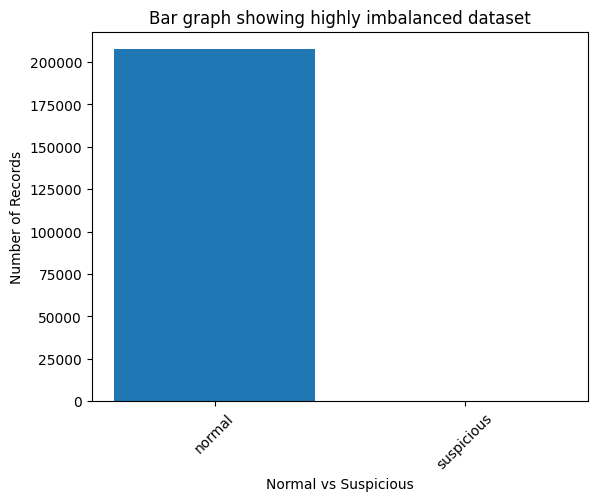

In [5]:
# The graph below shows this dataset is highly imbalanced.
# As a result, using measures like accuracy is more than likely not the best approach, 
# to understand how well our eventual model has "learned"
# via the training data
plt.title('Bar graph showing highly imbalanced dataset')
plt.bar(x=['normal', 'suspicious'], height=[ df_conn[df_conn.label == 0].shape[0], \
                                            df_conn[df_conn.label == 1].shape[0] ])
plt.ylabel(ylabel='Number of Records')
plt.xlabel(xlabel='Normal vs Suspicious')
plt.xticks(rotation=45)
plt.show()


In [7]:
# Getting the percentage of samples that are considered suspicious in this dataset
# This is going to be quite a challenge for this learning algorithm
(df_conn[df_conn.label == 1].shape[0] / df_conn.shape[0]) * 100

0.032272359446649454

In [8]:
# Extract the X_data
X_data = df_conn.drop(columns=['label'], inplace=False)
X_data

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
5,0.053276,208,976,6,528,6,1296
6,0.383646,227,692369,202,10739,117,240893
7,0.054294,208,977,6,528,6,1297
8,0.424980,227,791633,176,9387,174,367737
9,0.272567,227,406607,171,9127,71,169939
...,...,...,...,...,...,...,...
4430183,0.000051,0,0,1,52,1,40
4430184,0.000023,0,0,0,0,1,40
4430185,0.000005,0,0,0,0,1,40
4430186,0.000005,0,0,0,0,1,40


In [9]:
# Extract the labels
y_label = df_conn.label
y_label

5          0
6          0
7          0
8          0
9          0
          ..
4430183    0
4430184    0
4430185    0
4430186    0
4430187    0
Name: label, Length: 207608, dtype: int64

In [10]:
# prepare to split the data into training and testing sets
from sklearn.model_selection import train_test_split

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data.values, y_label, test_size=0.2, \
                                                    train_size=0.8, stratify=y_label, random_state=10)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((166086, 7), (166086,), (41522, 7), (41522,))

In [12]:
# With a statistical understanding of the normal and suspicious datasets, time to build the model
# Scaling was covered in 
#   06 - Beginning Data Scaling
# Scaling the data first
# import the scaler library
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler

In [13]:
# Setup the scaler
min_max_scaler = MinMaxScaler(feature_range=(0,1))

# Fit on the training data
min_max_scaler.fit(X_train)

# Transform the train data
X_train = min_max_scaler.transform(X_train)
X_train

array([[2.63072563e-07, 9.18795041e-08, 7.10178687e-08, ...,
        3.59579942e-07, 1.75013957e-06, 3.05765612e-07],
       [3.61672231e-07, 5.89415687e-08, 2.38314996e-08, ...,
        2.75234030e-07, 1.75013957e-06, 1.34744168e-07],
       [2.79225614e-09, 0.00000000e+00, 0.00000000e+00, ...,
        2.30841444e-07, 1.75013957e-06, 6.90995734e-08],
       ...,
       [1.68135854e-09, 0.00000000e+00, 0.00000000e+00, ...,
        2.30841444e-07, 1.75013957e-06, 6.90995734e-08],
       [1.65133428e-09, 0.00000000e+00, 0.00000000e+00, ...,
        2.30841444e-07, 1.75013957e-06, 6.90995734e-08],
       [3.49932746e-07, 7.80108997e-08, 8.38868784e-08, ...,
        3.24065874e-07, 1.75013957e-06, 3.52407824e-07]])

In [14]:
# Scale the test data
X_test = min_max_scaler.transform(X_test)
X_test

array([[1.73484676e-05, 3.90054499e-07, 8.33234064e-04, ...,
        7.60578166e-05, 6.94805411e-04, 1.16707452e-03],
       [5.08070521e-07, 6.41422953e-08, 5.29059290e-08, ...,
        2.88551805e-07, 1.75013957e-06, 2.40121018e-07],
       [4.43809598e-06, 2.05948775e-06, 1.84884774e-05, ...,
        9.69534066e-06, 5.60044664e-05, 6.65187043e-05],
       ...,
       [5.47522398e-07, 6.41422953e-08, 8.96064383e-08, ...,
        2.88551805e-07, 1.75013957e-06, 3.73137696e-07],
       [1.83147984e-09, 0.00000000e+00, 0.00000000e+00, ...,
        2.30841444e-07, 1.75013957e-06, 6.90995734e-08],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.95094010e-07, 0.00000000e+00, 0.00000000e+00]])

In [15]:
# Import PCA to leverage dimensionality reduction
# PCA was covered in notebook
#   07 - Beginning Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

In [16]:
# Setup PCA to use 3 principal Components
pca = PCA(n_components=3, random_state=10)
pca

PCA(n_components=3, random_state=10)

In [17]:
# Fit on the X_train
pca.fit(X_train)

# transform the training data
X_train = pca.transform(X_train)
X_train

array([[-0.00025828, -0.00023497, -0.00047665],
       [-0.00025839, -0.00023502, -0.00047653],
       [-0.00025846, -0.00023515, -0.00047686],
       ...,
       [-0.00025846, -0.00023515, -0.00047686],
       [-0.00025846, -0.00023515, -0.00047686],
       [-0.00025826, -0.00023494, -0.00047657]])

In [18]:
# Use the opportunity to PCA transform the X_test
X_test = pca.transform(X_test)
X_test

array([[ 0.00134937,  0.000691  , -0.0008094 ],
       [-0.00025832, -0.00023494, -0.0004764 ],
       [-0.00018612, -0.00015918, -0.0004979 ],
       ...,
       [-0.00025824, -0.00023488, -0.00047639],
       [-0.00025846, -0.00023515, -0.00047686],
       [-0.00025896, -0.0002359 , -0.00047662]])

In [19]:
# Import torch
import torch

# Import the torchinfo to get summary information
import torchinfo

In [20]:
# Convert the train and test data from numpy arrays to tensors
X_train, X_test = torch.tensor(data=X_train, dtype=torch.float32), torch.tensor(data=X_test, dtype=torch.float32)

# Get a snapshot of the data
X_train[:5], X_test[:5]

(tensor([[-0.0003, -0.0002, -0.0005],
         [-0.0003, -0.0002, -0.0005],
         [-0.0003, -0.0002, -0.0005],
         [-0.0003, -0.0002, -0.0005],
         [-0.0003, -0.0002, -0.0005]]),
 tensor([[ 0.0013,  0.0007, -0.0008],
         [-0.0003, -0.0002, -0.0005],
         [-0.0002, -0.0002, -0.0005],
         [-0.0003, -0.0002, -0.0005],
         [-0.0003, -0.0002, -0.0005]]))

In [21]:
# Convert the panda series to a numpy array
# Make the array 2 dimensions
# Reshape to have multiple rows and 1 column
y_train = np.array(y_train.values, ndmin=2, dtype=np.float32).reshape(-1, 1)
y_test = np.array(y_test.values, ndmin=2, dtype=np.float32).reshape(-1, 1)

# Get 5 samples from each
y_train[:5], y_test[:5]

(array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32))

In [22]:
# Convert the labels to torch tensor
y_train = torch.tensor(data=y_train, dtype=torch.float32)
y_test = torch.tensor(data=y_test, dtype=torch.float32)

y_train[:5], y_test[:5]

(tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]]),
 tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]]))

In [23]:
# Setup the model using the Sequential Class
torch_clf_model = torch.nn.Sequential(
    torch.nn.Linear(in_features=3, out_features=8),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=8, out_features=1),
    torch.nn.Sigmoid()
)

In [24]:
# Get the summary of the model
torchinfo.summary(torch_clf_model)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            32
├─ReLU: 1-2                              --
├─Linear: 1-3                            9
├─Sigmoid: 1-4                           --
Total params: 41
Trainable params: 41
Non-trainable params: 0

In [26]:
# Prepare to visualize the model
# https://github.com/mert-kurttutan/torchview
from torchview import draw_graph


(dot.exe:2876): Pango-WARNING **: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


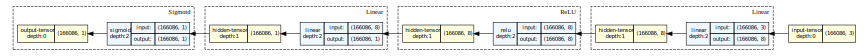

In [27]:
# Plot the model
# https://stackoverflow.com/questions/52468956/how-do-i-visualize-a-net-in-pytorch
model_graph = draw_graph(model=torch_clf_model, input_data=X_train, graph_name='torch_clf_model', \
                         expand_nested=True, save_graph=False,show_shapes=True, graph_dir='RL', \
                            roll=True, hide_inner_tensors=False, hide_module_functions=False)
model_graph.visual_graph

In [28]:
# Get a look at the initialized parameters - weights and bias
torch_clf_model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3049,  0.3210,  0.4646],
                      [ 0.4077,  0.0838,  0.4764],
                      [ 0.3248, -0.2990, -0.4359],
                      [-0.0978, -0.0197,  0.2218],
                      [ 0.4613, -0.5320,  0.0982],
                      [ 0.2858,  0.4103,  0.5334],
                      [-0.1460,  0.2623, -0.1523],
                      [ 0.4883, -0.5589, -0.0547]])),
             ('0.bias',
              tensor([ 0.2123, -0.0288, -0.5343,  0.3325,  0.4055, -0.2915,  0.3694, -0.1998])),
             ('2.weight',
              tensor([[-0.3039, -0.0580,  0.2659, -0.0606, -0.2997, -0.1331,  0.0738,  0.2015]])),
             ('2.bias', tensor([0.1238]))])

In [30]:
# Before training the model, let's see what ReLU does
# Setup some samples between -10 and 10, space them by 0.1
sample_numbers = np.arange(-10, 10, 0.1)
np.round(sample_numbers[95:106], 2)

array([-0.5, -0.4, -0.3, -0.2, -0.1, -0. ,  0.1,  0.2,  0.3,  0.4,  0.5])

Text(0, 0.5, 'Range of Values')

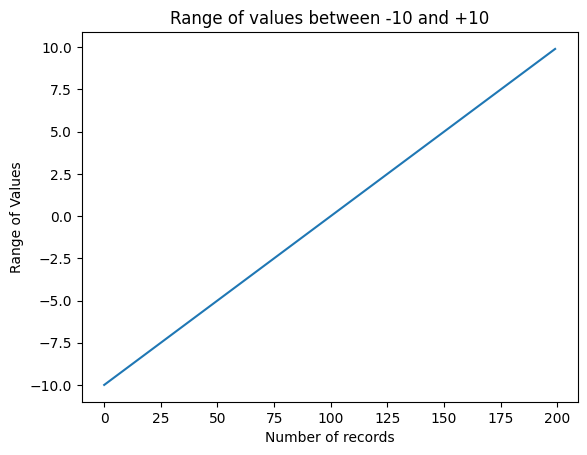

In [31]:
# Plot the numbers that were created above
# we see there are 200 numbers between -10 and 10
plt.title('Range of values between -10 and +10')
plt.plot(sample_numbers)
plt.xlabel('Number of records')
plt.ylabel('Range of Values')

In [33]:
# With ReLU, anything less than 0 will be made 0 and anything above 0 will be kept the same
# Setup a function to take care of this 
def my_relu(x: np.array) -> list:
    ''' Computes  ReLU from the x '''
    return [ 0 if i <=0 else i for i in x ]

In [34]:
# Testing our function with 2 values
# One less than 0 and another greater than 0
# We see below when x is less than 0, the value returned is 0
my_relu(np.array([-10])), my_relu(np.array([0])), my_relu(np.array([10])), 

([0], [0], [10])

In [35]:
# Running ReLU against our samples
my_relu(sample_numbers)[96:106]

[0,
 0,
 0,
 0,
 0,
 0.09999999999996412,
 0.19999999999996376,
 0.2999999999999634,
 0.39999999999996305,
 0.4999999999999627]

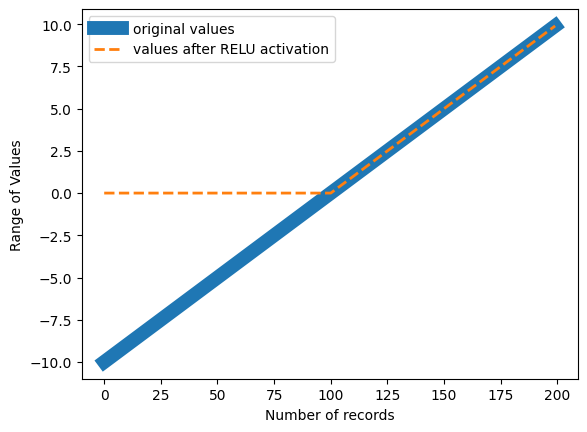

In [36]:
# Making this more visual by plotting the original numbers vs the numbers which ReLU has been applied to
# As we can see, anything below 0 has now become 0
plt.plot(sample_numbers, lw=10, label='original values')
plt.plot(my_relu(sample_numbers), lw=2, linestyle='--', label='values after RELU activation')
plt.xlabel('Number of records')
plt.ylabel('Range of Values')
plt.legend()
plt.show()

In [37]:
# In the following notebooks:
#   13. Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch
#   15. Beginning Deep Learning, - Linear Regression, PyTorch
# the training was all done outside of a function. 
# Rather than rewriting the same code all the time, let's to create a function
def torch_training(model=None, epochs=10, learning_rate=0.01, x_train=X_train, \
                   y_train=y_train, x_test=X_test, y_test=y_test):
    ''' Performs training of the model '''
    # Create to lists to save the training and test loss respectively 
    training_loss, validation_loss = [], []

    # Setup the loss function
    clf_loss_fn = torch.nn.BCELoss()

    # Setup the optimizer
    clf_optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        # Clear the gradients
        clf_optimizer.zero_grad()

        # Train the model
        model.train()

        # Make predictions on the training data
        train_preds = model(x_train)
    
        # Get the loss
        train_loss = clf_loss_fn(train_preds, y_train)
        training_loss.append(train_loss)

        # Calculate the gradients
        train_loss.backward()

        # Upgrade the gradients
        clf_optimizer.step()

        # Evaluate the model at the same time
        model.eval()
        with torch.inference_mode():
            val_preds = model(X_test)

            # Calculate the loss on the validation data
            val_loss = clf_loss_fn(val_preds, y_test)
            validation_loss.append(val_loss)

        if epoch %50 == 0:
            print(f'Epoch: {epoch} \t training loss: {train_loss} \t validation loss {val_loss}')
    
    return model, training_loss, validation_loss

In [38]:
# Set a random seed to make this repatable
torch.manual_seed(seed=10)

# Call the function with the associated parameters
#(model, train_loss, val_loss) = torch_training(model=torch_clf_model, epochs=300, learning_rate=0.01)
torch_clf_model = torch_training(model=torch_clf_model, epochs=300, learning_rate=0.01)

Epoch: 0 	 training loss: 0.665999174118042 	 validation loss 0.651168704032898
Epoch: 50 	 training loss: 0.0725250393152237 	 validation loss 0.06825146079063416
Epoch: 100 	 training loss: 0.010986275039613247 	 validation loss 0.01067196112126112
Epoch: 150 	 training loss: 0.0056804451160132885 	 validation loss 0.005528232082724571
Epoch: 200 	 training loss: 0.004046980757266283 	 validation loss 0.003935811575502157
Epoch: 250 	 training loss: 0.0033011543564498425 	 validation loss 0.003235849551856518


In [39]:
# What has the model returned?
torch_clf_model

(Sequential(
   (0): Linear(in_features=3, out_features=8, bias=True)
   (1): ReLU()
   (2): Linear(in_features=8, out_features=1, bias=True)
   (3): Sigmoid()
 ),
 [tensor(0.6660, grad_fn=<BinaryCrossEntropyBackward0>),
  tensor(0.6512, grad_fn=<BinaryCrossEntropyBackward0>),
  tensor(0.6364, grad_fn=<BinaryCrossEntropyBackward0>),
  tensor(0.6216, grad_fn=<BinaryCrossEntropyBackward0>),
  tensor(0.6067, grad_fn=<BinaryCrossEntropyBackward0>),
  tensor(0.5919, grad_fn=<BinaryCrossEntropyBackward0>),
  tensor(0.5770, grad_fn=<BinaryCrossEntropyBackward0>),
  tensor(0.5621, grad_fn=<BinaryCrossEntropyBackward0>),
  tensor(0.5473, grad_fn=<BinaryCrossEntropyBackward0>),
  tensor(0.5324, grad_fn=<BinaryCrossEntropyBackward0>),
  tensor(0.5176, grad_fn=<BinaryCrossEntropyBackward0>),
  tensor(0.5028, grad_fn=<BinaryCrossEntropyBackward0>),
  tensor(0.4880, grad_fn=<BinaryCrossEntropyBackward0>),
  tensor(0.4732, grad_fn=<BinaryCrossEntropyBackward0>),
  tensor(0.4585, grad_fn=<BinaryCrossE

In [40]:
# Get the model Learned parameters - Weights and Bias
torch_clf_model[0].state_dict()

OrderedDict([('0.weight',
              tensor([[-2.8392, -3.1261, -2.5994],
                      [-2.7980, -3.4377, -2.6227],
                      [ 0.3248, -0.2990, -0.4359],
                      [-3.3248, -3.5046, -3.0368],
                      [-2.5215, -3.8486, -2.9221],
                      [ 1.0529, -2.1574, -2.3077],
                      [-3.6139, -3.2792, -3.3220],
                      [ 0.2648, -0.3362, -0.2731]])),
             ('0.bias',
              tensor([ 0.9188,  0.9021, -0.5343,  1.1878,  1.1038,  0.9125,  1.1067, -0.4104])),
             ('2.weight',
              tensor([[-1.0450, -1.0983,  0.2659, -0.7746, -0.9735, -1.8501, -0.6376, -0.0184]])),
             ('2.bias', tensor([-0.4148]))])

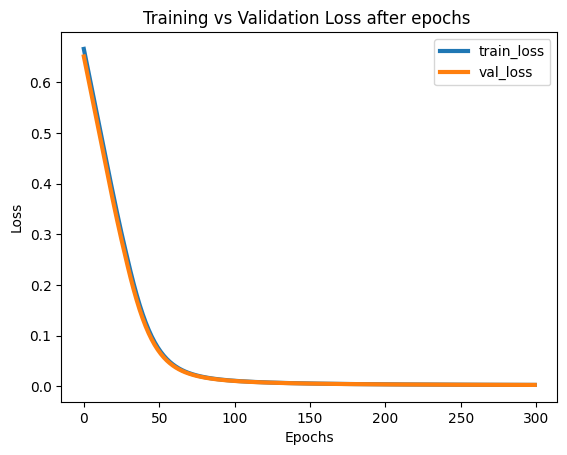

In [41]:
# Plotting the training loss values
plt.title(f'Training vs Validation Loss after epochs ')

# Trying to plot on the "training_loss" by itself will not work
# Matplotlib will more than likely throw an error
# Hence we needed to do "torch.tensor(training_loss).detach().numpy()"
plt.plot(torch.tensor(torch_clf_model[1]).detach().numpy(), lw=3, label='train_loss')
plt.plot(torch.tensor(torch_clf_model[2]).detach().numpy(), lw=3, label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# That's a nice looking graph above there

In [42]:
# With the training loss trending downwards, this suggest a few more epochs may make the mode perform even better
# How did our model do for training
# import some metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
# Looking at y_true
y_test

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

In [44]:
# Make predictions on the test set
# We see the values are continuous
with torch.inference_mode():
    test_preds = torch_clf_model[0](X_test)

test_preds

tensor([[0.0012],
        [0.0011],
        [0.0011],
        ...,
        [0.0011],
        [0.0011],
        [0.0011]])

In [45]:
# If we try to feed this to some of our metrics algorithm, it will get a value error such as
# " Classification metrics can't handle a mix of binary and continuous targets"
# As a result, I round it out instead
np.round(test_preds)

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

In [46]:
# Let's save these predictions out to a variable
x_test_preds = np.round(test_preds)
x_test_preds

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

In [47]:
# Grabbing the accuracy score
# With that understanding above, let grab the accuracy score
accuracy_score(y_true=y_test, y_pred=x_test_preds)

0.9996869129618033

In [48]:
# Not a bad accuracy score
# import seaborn
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
import seaborn as sns

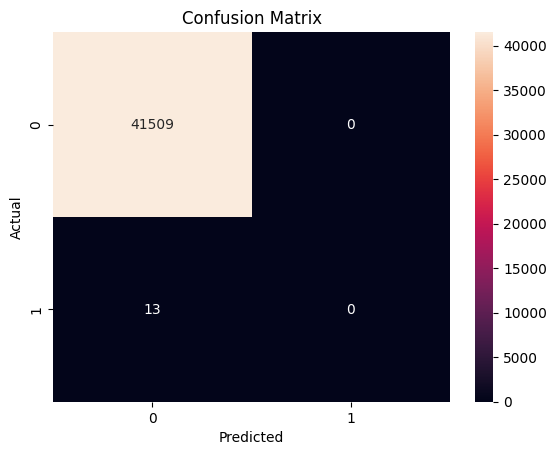

In [49]:
# Looking at the confusion matrix, This does not seem so bad
# We learned about metrics in notebook:
#   10. Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=x_test_preds), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [50]:
# Above should help us to understand that accuracy is not the best measurement for imbalanced classification problems
# Overall, this model is terrible. Context is important!!
# This is actually a model, I would not put in production for my security monitoring
# If I am able to ignore 41,509 records that's a good thing. 
# However, I have 13 false negatives. 
# This model also did not pick-up any true positives
# Obviously, no one wants these false negatives. Hopefully, we can catch those "threats" via threat hunting
# Looking at the classification report
print(classification_report(y_true=y_test, y_pred=x_test_preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     41509
         1.0       0.00      0.00      0.00        13

    accuracy                           1.00     41522
   macro avg       0.50      0.50      0.50     41522
weighted avg       1.00      1.00      1.00     41522



C:\Users\SecurityNik\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SecurityNik\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SecurityNik\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [51]:
# Confirming there are only 13 records flagged as suspicious
len(list(np.where(y_test == 1))[0])

13

In [52]:
# Let's define a sample with the features values: 
# duration	orig_bytes	resp_bytes	orig_pkts	orig_ip_bytes	resp_pkts	resp_ip_bytes
new_sample = np.array([141., 356138566,	11037090, 60, 3026679, 33, 982584], dtype=float, ndmin=2)

# Preprocess the new samples as was done with the training data
new_sample = pca.transform(min_max_scaler.transform(new_sample))

# Convert the sample to a torch tensor
new_sample = torch.tensor(data= new_sample, dtype=torch.float32)
new_sample

tensor([[ 0.0885,  0.0155, -0.0015]])

In [53]:
# Make a prediction on the sample
# Remember, the previously unseen data has to go through the same transformation as the training data
# See:
#   06 - Beginning Data Scaling
#   07 - Beginning Principal Component Analysis (PCA)
torch_clf_model[0].eval()
new_pred = torch_clf_model[0](new_sample)
new_pred

tensor([[0.0042]], grad_fn=<SigmoidBackward0>)

In [54]:
# Import the data time library
from datetime import datetime

In [55]:
# Report a sample as suspicious, if it's threshold is greater than 0.5
f'{datetime.now()} - [!] ALERT ** SUSPICIOUS ACTIVITY ** Zeek conn.log' if new_pred > 0.5  \
    else "[**] {datetime.now()} - Normal Traffic"

'[**] {datetime.now()} - Normal Traffic'

In [56]:
# Setup a suspicious sample
new_sample = np.array([5000., 356138566,	11037090, 6000, 3026679, 9999999, 982584], dtype=float, ndmin=2)

# Preprocess the new samples as was done with the training data
new_sample = pca.transform(min_max_scaler.transform(new_sample))

# Convert the sample to a torch tensor
new_sample = torch.tensor(data= new_sample, dtype=torch.float32)
new_sample

tensor([[ 5.0943,  7.5641, -2.2904]])

In [57]:
# Transform the sample
new_pred = torch_clf_model[0](new_sample)
new_pred

tensor([[0.3978]], grad_fn=<SigmoidBackward0>)

In [58]:
# Report a sample as suspicious, if it's threshold is greater than 0.5
f'{datetime.now()} - [!] ALERT ** SUSPICIOUS ACTIVITY ** Zeek conn.log' if new_pred > 0.5  \
    else "[**] {datetime.now()} - Normal Traffic"

'[**] {datetime.now()} - Normal Traffic'

In [59]:
# Interesting, both instances we have negative classification. 
# Remember, this model failed to find any true or false positives. 
# Hence we should not trust what was done here
# Remember, the model also had false negatives. I would consider this a false negative.
# If you want to know why I think so, hit me up for my opinion.

In [60]:
# Import the os library
import os

In [61]:
# Create the location to save the model
PATH = './SAVED_MODELS/TORCH_classification/'
MODELS_PATH = os.makedirs(name=PATH, exist_ok=True)

In [62]:
# Save the model
torch.save(obj=torch_clf_model[0], f=F'{PATH}/torch_clf_model_saved_dict.pth')

In [63]:
loaded_clf_torch_model = torch.load(f=f'{PATH}torch_clf_model_saved_dict.pth')
loaded_clf_torch_model


Sequential(
  (0): Linear(in_features=3, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
  (3): Sigmoid()
)

In [64]:
# Make a prediction on the loaded model
loaded_clf_torch_model(new_sample)

tensor([[0.3978]], grad_fn=<SigmoidBackward0>)

In [65]:
# That's it! Moving on!!